In [ ]:
#First Lets Create the entropy and apply one hot encoding to all categories


In [1]:
#import block

import pandas as pd
import category_encoders as ce
import numpy as np
from scipy.stats import entropy


In [2]:
tab_data_unfiltered = pd.read_csv("data\motionStrike_TVcodes_data.tsv", delimiter = '\t')
tab_data_unfiltered

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\aarya\AppData\Local\Temp\ipykernel_11164\680595952.py:1: SyntaxWarning: invalid escape sequence '\m'
  tab_data_unfiltered = pd.read_csv("data\motionStrike_TVcodes_data.tsv", delimiter = '\t')


,CaseReferenceNumber,MotionID,CaseLocation,CaseMajorCode,CaseMinorCode,CaseTrialListType,CaseMarkingCode,CaseDispositionJudgeJurisNo,CaseDispositionDocketLegendCode,MotionResultCode,...,MotionJurisNumber,MotionDocumentPriorityCode,CaseAttorneyJuris,CaseAttorneyType,MotionTimeDuration,MotionDocumentTypeName,SelfRepBeforeMotionFileCount,SelfRepBeforeMotionDecidedCount,SelfRepBeforeMotionFileBool,SelfRepBeforeMotionDecidedBool
0,207,1751,FBT,V,1,9,16.0,416586.0,JDGDACT,GR,...,418027.0,30,418027.0,J,78.0,MOTION TO STRIKE,1,1,True,True
1,1472,10915,FBT,V,1,9,16.0,NaN,WDACT,DN,...,416586.0,30,416586.0,R,22.0,MOTION TO STRIKE,0,0,False,False
2,1494,11050,NNI,V,1,9,16.0,NaN,WDACT,GR,...,422392.0,30,422392.0,J,285.0,MOTION TO STRIKE,0,0,False,False
3,371,2708,LLI,T,90,-1,NaN,418028.0,SJD,OR,...,418028.0,30,418028.0,R,120.0,MOTION TO STRIKE,0,0,False,False
4,1422,10373,HHD,T,2,-1,NaN,422394.0,SJ,GR,...,81181.0,30,81181.0,R,153.0,MOTION TO STRIKE,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13798,4137836,26395795,HHD,T,20,-1,NaN,NaN,NaN,OR,...,415596.0,30,415596.0,R,47.0,MOTION TO STRIKE,0,0,False,False
13799,4143717,26397468,HHB,T,61,-1,NaN,NaN,NaN,DN,...,431662.0,30,431662.0,J,49.0,MOTION TO STRIKE,0,0,False,False
13800,4111125,26482434,TTD,T,29,-1,NaN,NaN,NaN,GR,...,436946.0,30,436946.0,J,47.0,MOTION TO STRIKE,1,2,True,True
13801,4026253,26397700,FBT,T,90,-1,NaN,NaN,NaN,GR,...,438581.0,30,438581.0,J,47.0,MOTION TO STRIKE,0,0,False,False


In [ ]:
#important columns identifiers 
target= tab_data_unfiltered["MotionResultCode"]
#potential features
features = tab_data_unfiltered[["CaseMajorCode", "MotionTimeDuration", "CaseLocation", "CaseAttorneyJuris"]]
features

,CaseMajorCode,MotionTimeDuration,CaseLocation,CaseAttorneyJuris
0,V,78.0,FBT,418027.0
1,V,22.0,FBT,416586.0
2,V,285.0,NNI,422392.0
3,T,120.0,LLI,418028.0
4,T,153.0,HHD,81181.0
...,...,...,...,...
13798,T,47.0,HHD,415596.0
13799,T,49.0,HHB,431662.0
13800,T,47.0,TTD,436946.0
13801,T,47.0,FBT,438581.0


In [36]:
target

0        GR
1        DN
2        GR
3        OR
4        GR
         ..
13798    OR
13799    DN
13800    GR
13801    GR
13802    WD
Name: MotionResultCode, Length: 13803, dtype: object

In [ ]:
#for case location find each value like FBT NNI assign it to a key and then replace the key 
caseMajor = {}
for i in features["CaseLocation"]:
    caseMajor[i] = caseMajor.get(i, 0) + 1

Caselength = len(caseMajor)
print(f"The Length is {Caselength} and the frequencies are:\n {caseMajor}")

caseMajor = {}
for i in features["CaseMajorCode"]:
    caseMajor[i] = caseMajor.get(i, 0) + 1

Caselength = len(caseMajor)
print(f"The Length is {Caselength} and the frequencies are:\n {caseMajor}")

#assign values 1 to 15


#binary encoding to CaseMajorCode 
be = ce.BinaryEncoder(cols = 'CaseMajorCode',return_features_new1 = True)
major_encoded = be.fit_transform(features)
#not sure if this is what was intended but role with it for now
print(major_encoded)

#for CaseLocation two methods
#label encoding or frequency encoding
#less variability with near by number allocation with frequency encoding try that
fe =  ce.CountEncoder(cols = 'CaseLocation', normalize = True)
loc_encoded = fe.fit_transform(features)



#adding attorney specialization part
def calculate_attorney_specialization(specialtab):
    # Make a copy of the input dataframe to avoid the warning
    features_new = specialtab.copy()
    
    # Group by attorney and count case types
    case_counts = pd.crosstab(df['CaseAttorneyJuris'], 
                             df['CaseMajorCode'])
    
    # Calculate entropy with Dirichlet smoothing for each attorney
    attorney_entropy = {}
    for attorney in case_counts.index:
        counts = case_counts.loc[attorney]
        
        # Apply Dirichlet smoothing (adding 1 to each count)
        smoothed_counts = counts + 1
        # Calculate proportions
        proportions = smoothed_counts / smoothed_counts.sum()
        # Calculate entropy
        attorney_entropy[attorney] = entropy(proportions, base=2)
    
    # Add entropy back to dataframe
    df['AttorneySpecialization'] = df['CaseAttorneyJuris'].map(attorney_entropy)
    
    return df
specialentropy = calculate_attorney_specialization(tab_data_unfiltered)

# Look at entropy scores
print("\nEntropy scores:")
print(specialentropy.groupby('CaseAttorneyJuris')['AttorneySpecialization'].head())

print("\nMost specialized attorneys (lowest entropy):")
print(specialentropy.groupby('CaseAttorneyJuris')
      .agg({'AttorneySpecialization': 'first', 'CaseMajorCode': lambda x: x.value_counts().to_dict()})
      .sort_values('AttorneySpecialization')
      .head())



The Length is 15 and the frequencies are:
 {'FBT': 2003, 'NNI': 213, 'LLI': 287, 'HHD': 3094, 'FST': 1494, 'MMX': 519, 'NNH': 1528, 'KNO': 67, 'HHB': 999, 'KNL': 833, 'DBD': 489, 'UWY': 1369, 'AAN': 518, 'TTD': 183, 'WWM': 207}
The Length is 2 and the frequencies are:
 {'V': 5538, 'T': 8265}
       CaseMajorCode_0  CaseMajorCode_1  MotionTimeDuration CaseLocation  \
0                    0                1                78.0          FBT   
1                    0                1                22.0          FBT   
2                    0                1               285.0          NNI   
3                    1                0               120.0          LLI   
4                    1                0               153.0          HHD   
...                ...              ...                 ...          ...   
13798                1                0                47.0          HHD   
13799                1                0                49.0          HHB   
13800                1 

In [5]:
major_encoded

features_new = pd.concat([major_encoded['CaseMajorCode_0'], major_encoded['CaseMajorCode_1'], loc_encoded['CaseLocation'],specialentropy['AttorneySpecialization'],features['CaseAttorneyJuris'],features['MotionTimeDuration']],axis = 1 )

In [6]:
features_new

,CaseMajorCode_0,CaseMajorCode_1,CaseLocation,AttorneySpecialization,CaseAttorneyJuris,MotionTimeDuration
0,0,1,0.145113,0.999273,418027.0,78.0
1,0,1,0.145113,0.992774,416586.0,22.0
2,0,1,0.015431,0.999571,422392.0,285.0
3,1,0,0.020793,0.902393,418028.0,120.0
4,1,0,0.224154,0.977001,81181.0,153.0
...,...,...,...,...,...,...
13798,1,0,0.224154,0.980867,415596.0,47.0
13799,1,0,0.072376,0.884115,431662.0,49.0
13800,1,0,0.013258,0.991076,436946.0,47.0
13801,1,0,0.145113,0.989588,438581.0,47.0


In [12]:
variances = features_new.var()
variances

CaseMajorCode_0           2.402594e-01
CaseMajorCode_1           2.402594e-01
CaseLocation              4.487301e-03
AttorneySpecialization    5.965001e-03
CaseAttorneyJuris         1.336861e+10
MotionTimeDuration        1.732654e+04
dtype: float64

In [11]:
#feature engineering
#mean - for each column 
means = features_new.mean()
means




CaseMajorCode_0                0.598783
CaseMajorCode_1                0.401217
CaseLocation                   0.119162
AttorneySpecialization         0.947753
CaseAttorneyJuris         372421.588370
MotionTimeDuration           108.457531
dtype: float64

In [ ]:
#some experimenting with the feature engineering

features_new['CaseLocation_mean_diff'] = features_new['CaseLocation'] - means['CaseLocation']
features_new['MotionTimeDuration_variance_ratio'] = features_new['MotionTimeDuration'] / variances['MotionTimeDuration']


In [17]:
features_new

,CaseMajorCode_0,CaseMajorCode_1,CaseLocation,AttorneySpecialization,CaseAttorneyJuris,MotionTimeDuration,CaseLocation_mean_diff,MotionTimeDuration_variance_ratio
0,0,1,0.145113,0.999273,418027.0,78.0,0.025951,0.004502
1,0,1,0.145113,0.992774,416586.0,22.0,0.025951,0.001270
2,0,1,0.015431,0.999571,422392.0,285.0,-0.103731,0.016449
3,1,0,0.020793,0.902393,418028.0,120.0,-0.098369,0.006926
4,1,0,0.224154,0.977001,81181.0,153.0,0.104992,0.008830
...,...,...,...,...,...,...,...,...
13798,1,0,0.224154,0.980867,415596.0,47.0,0.104992,0.002713
13799,1,0,0.072376,0.884115,431662.0,49.0,-0.046786,0.002828
13800,1,0,0.013258,0.991076,436946.0,47.0,-0.105904,0.002713
13801,1,0,0.145113,0.989588,438581.0,47.0,0.025951,0.002713


In [ ]:
#entropy 
def calculate_entropy(series):
    value_counts = series.value_counts()
    return entropy(value_counts)

entropies = features_new.apply(calculate_entropy)

entropies


CaseMajorCode_0                      0.673502
CaseMajorCode_1                      0.673502
CaseLocation                         2.344238
AttorneySpecialization               4.717572
CaseAttorneyJuris                    5.009087
MotionTimeDuration                   5.458849
CaseLocation_mean_diff               2.344238
MotionTimeDuration_variance_ratio    5.458849
dtype: float64

In [23]:
features_new['CaseLocation_entropy'] = calculate_entropy(features_new['CaseLocation'])
features_new['MotionTimeDuration_entropy'] = calculate_entropy(features_new['MotionTimeDuration'])
features_new

,CaseMajorCode_0,CaseMajorCode_1,CaseLocation,AttorneySpecialization,CaseAttorneyJuris,MotionTimeDuration,CaseLocation_mean_diff,MotionTimeDuration_variance_ratio,CaseLocation_entropy,MotionTimeDuration_entropy
0,0,1,0.145113,0.999273,418027.0,78.0,0.025951,0.004502,2.344238,5.458849
1,0,1,0.145113,0.992774,416586.0,22.0,0.025951,0.001270,2.344238,5.458849
2,0,1,0.015431,0.999571,422392.0,285.0,-0.103731,0.016449,2.344238,5.458849
3,1,0,0.020793,0.902393,418028.0,120.0,-0.098369,0.006926,2.344238,5.458849
4,1,0,0.224154,0.977001,81181.0,153.0,0.104992,0.008830,2.344238,5.458849
...,...,...,...,...,...,...,...,...,...,...
13798,1,0,0.224154,0.980867,415596.0,47.0,0.104992,0.002713,2.344238,5.458849
13799,1,0,0.072376,0.884115,431662.0,49.0,-0.046786,0.002828,2.344238,5.458849
13800,1,0,0.013258,0.991076,436946.0,47.0,-0.105904,0.002713,2.344238,5.458849
13801,1,0,0.145113,0.989588,438581.0,47.0,0.025951,0.002713,2.344238,5.458849


In [37]:
target

0        GR
1        DN
2        GR
3        OR
4        GR
         ..
13798    OR
13799    DN
13800    GR
13801    GR
13802    WD
Name: MotionResultCode, Length: 13803, dtype: object

In [ ]:
result = target.value_counts()

length = len(result)
print(f"The Length is {length} and the frequencies are:\n{result}")


targ = ce.CountEncoder(cols=['MotionResultCode'], normalize=True)
targ_gen = targ.fit_transform(target)


The Length is 11 and the frequencies are:
MotionResultCode
GR    4957
DN    4235
OR    3227
OF     657
OD     410
TP     166
WD     131
SU      13
OV       5
RE       1
FR       1
Name: count, dtype: int64


In [52]:

targ_gen



,MotionResultCode
0,0.359125
1,0.306817
2,0.359125
3,0.233790
4,0.359125
...,...
13798,0.233790
13799,0.306817
13800,0.359125
13801,0.359125


In [53]:

final =  pd.concat([features_new,targ_gen], axis =1)
final


,CaseMajorCode_0,CaseMajorCode_1,CaseLocation,AttorneySpecialization,CaseAttorneyJuris,MotionTimeDuration,CaseLocation_mean_diff,MotionTimeDuration_variance_ratio,CaseLocation_entropy,MotionTimeDuration_entropy,MotionResultCode
0,0,1,0.145113,0.999273,418027.0,78.0,0.025951,0.004502,2.344238,5.458849,0.359125
1,0,1,0.145113,0.992774,416586.0,22.0,0.025951,0.001270,2.344238,5.458849,0.306817
2,0,1,0.015431,0.999571,422392.0,285.0,-0.103731,0.016449,2.344238,5.458849,0.359125
3,1,0,0.020793,0.902393,418028.0,120.0,-0.098369,0.006926,2.344238,5.458849,0.233790
4,1,0,0.224154,0.977001,81181.0,153.0,0.104992,0.008830,2.344238,5.458849,0.359125
...,...,...,...,...,...,...,...,...,...,...,...
13798,1,0,0.224154,0.980867,415596.0,47.0,0.104992,0.002713,2.344238,5.458849,0.233790
13799,1,0,0.072376,0.884115,431662.0,49.0,-0.046786,0.002828,2.344238,5.458849,0.306817
13800,1,0,0.013258,0.991076,436946.0,47.0,-0.105904,0.002713,2.344238,5.458849,0.359125
13801,1,0,0.145113,0.989588,438581.0,47.0,0.025951,0.002713,2.344238,5.458849,0.359125


In [ ]:
from sklearn.ensemble import IsolationForest


X = final.drop('MotionResultCode', axis=1) 
y = final['MotionResultCode'] # store target variable

model = IsolationForest(n_estimators=100, random_state=42)
model.fit(X)


IsolationForest(random_state=42)

In [55]:
anomaly_predictions = model.predict(X)
final['Anomaly'] = anomaly_predictions
anomalies = final[final['Anomaly'] == -1]
print("Anomalies:")
anomalies


Anomalies:


,CaseMajorCode_0,CaseMajorCode_1,CaseLocation,AttorneySpecialization,CaseAttorneyJuris,MotionTimeDuration,CaseLocation_mean_diff,MotionTimeDuration_variance_ratio,CaseLocation_entropy,MotionTimeDuration_entropy,MotionResultCode,Anomaly
2,0,1,0.015431,0.999571,422392.0,285.0,-0.103731,0.016449,2.344238,5.458849,0.359125,-1
4,1,0,0.224154,0.977001,81181.0,153.0,0.104992,0.008830,2.344238,5.458849,0.359125,-1
7,0,1,0.224154,1.000000,406511.0,167.0,0.104992,0.009638,2.344238,5.458849,0.233790,-1
8,0,1,0.224154,NaN,NaN,186.0,0.104992,0.010735,2.344238,5.458849,0.029704,-1
11,0,1,0.110701,0.820364,80627.0,32.0,-0.008461,0.001847,2.344238,5.458849,0.359125,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
13778,0,1,0.224154,0.775513,431199.0,0.0,0.104992,0.000000,2.344238,5.458849,0.359125,-1
13785,0,1,0.224154,0.954434,438570.0,50.0,0.104992,0.002886,2.344238,5.458849,0.306817,-1
13786,0,1,0.224154,0.998636,438572.0,29.0,0.104992,0.001674,2.344238,5.458849,0.359125,-1
13800,1,0,0.013258,0.991076,436946.0,47.0,-0.105904,0.002713,2.344238,5.458849,0.359125,-1


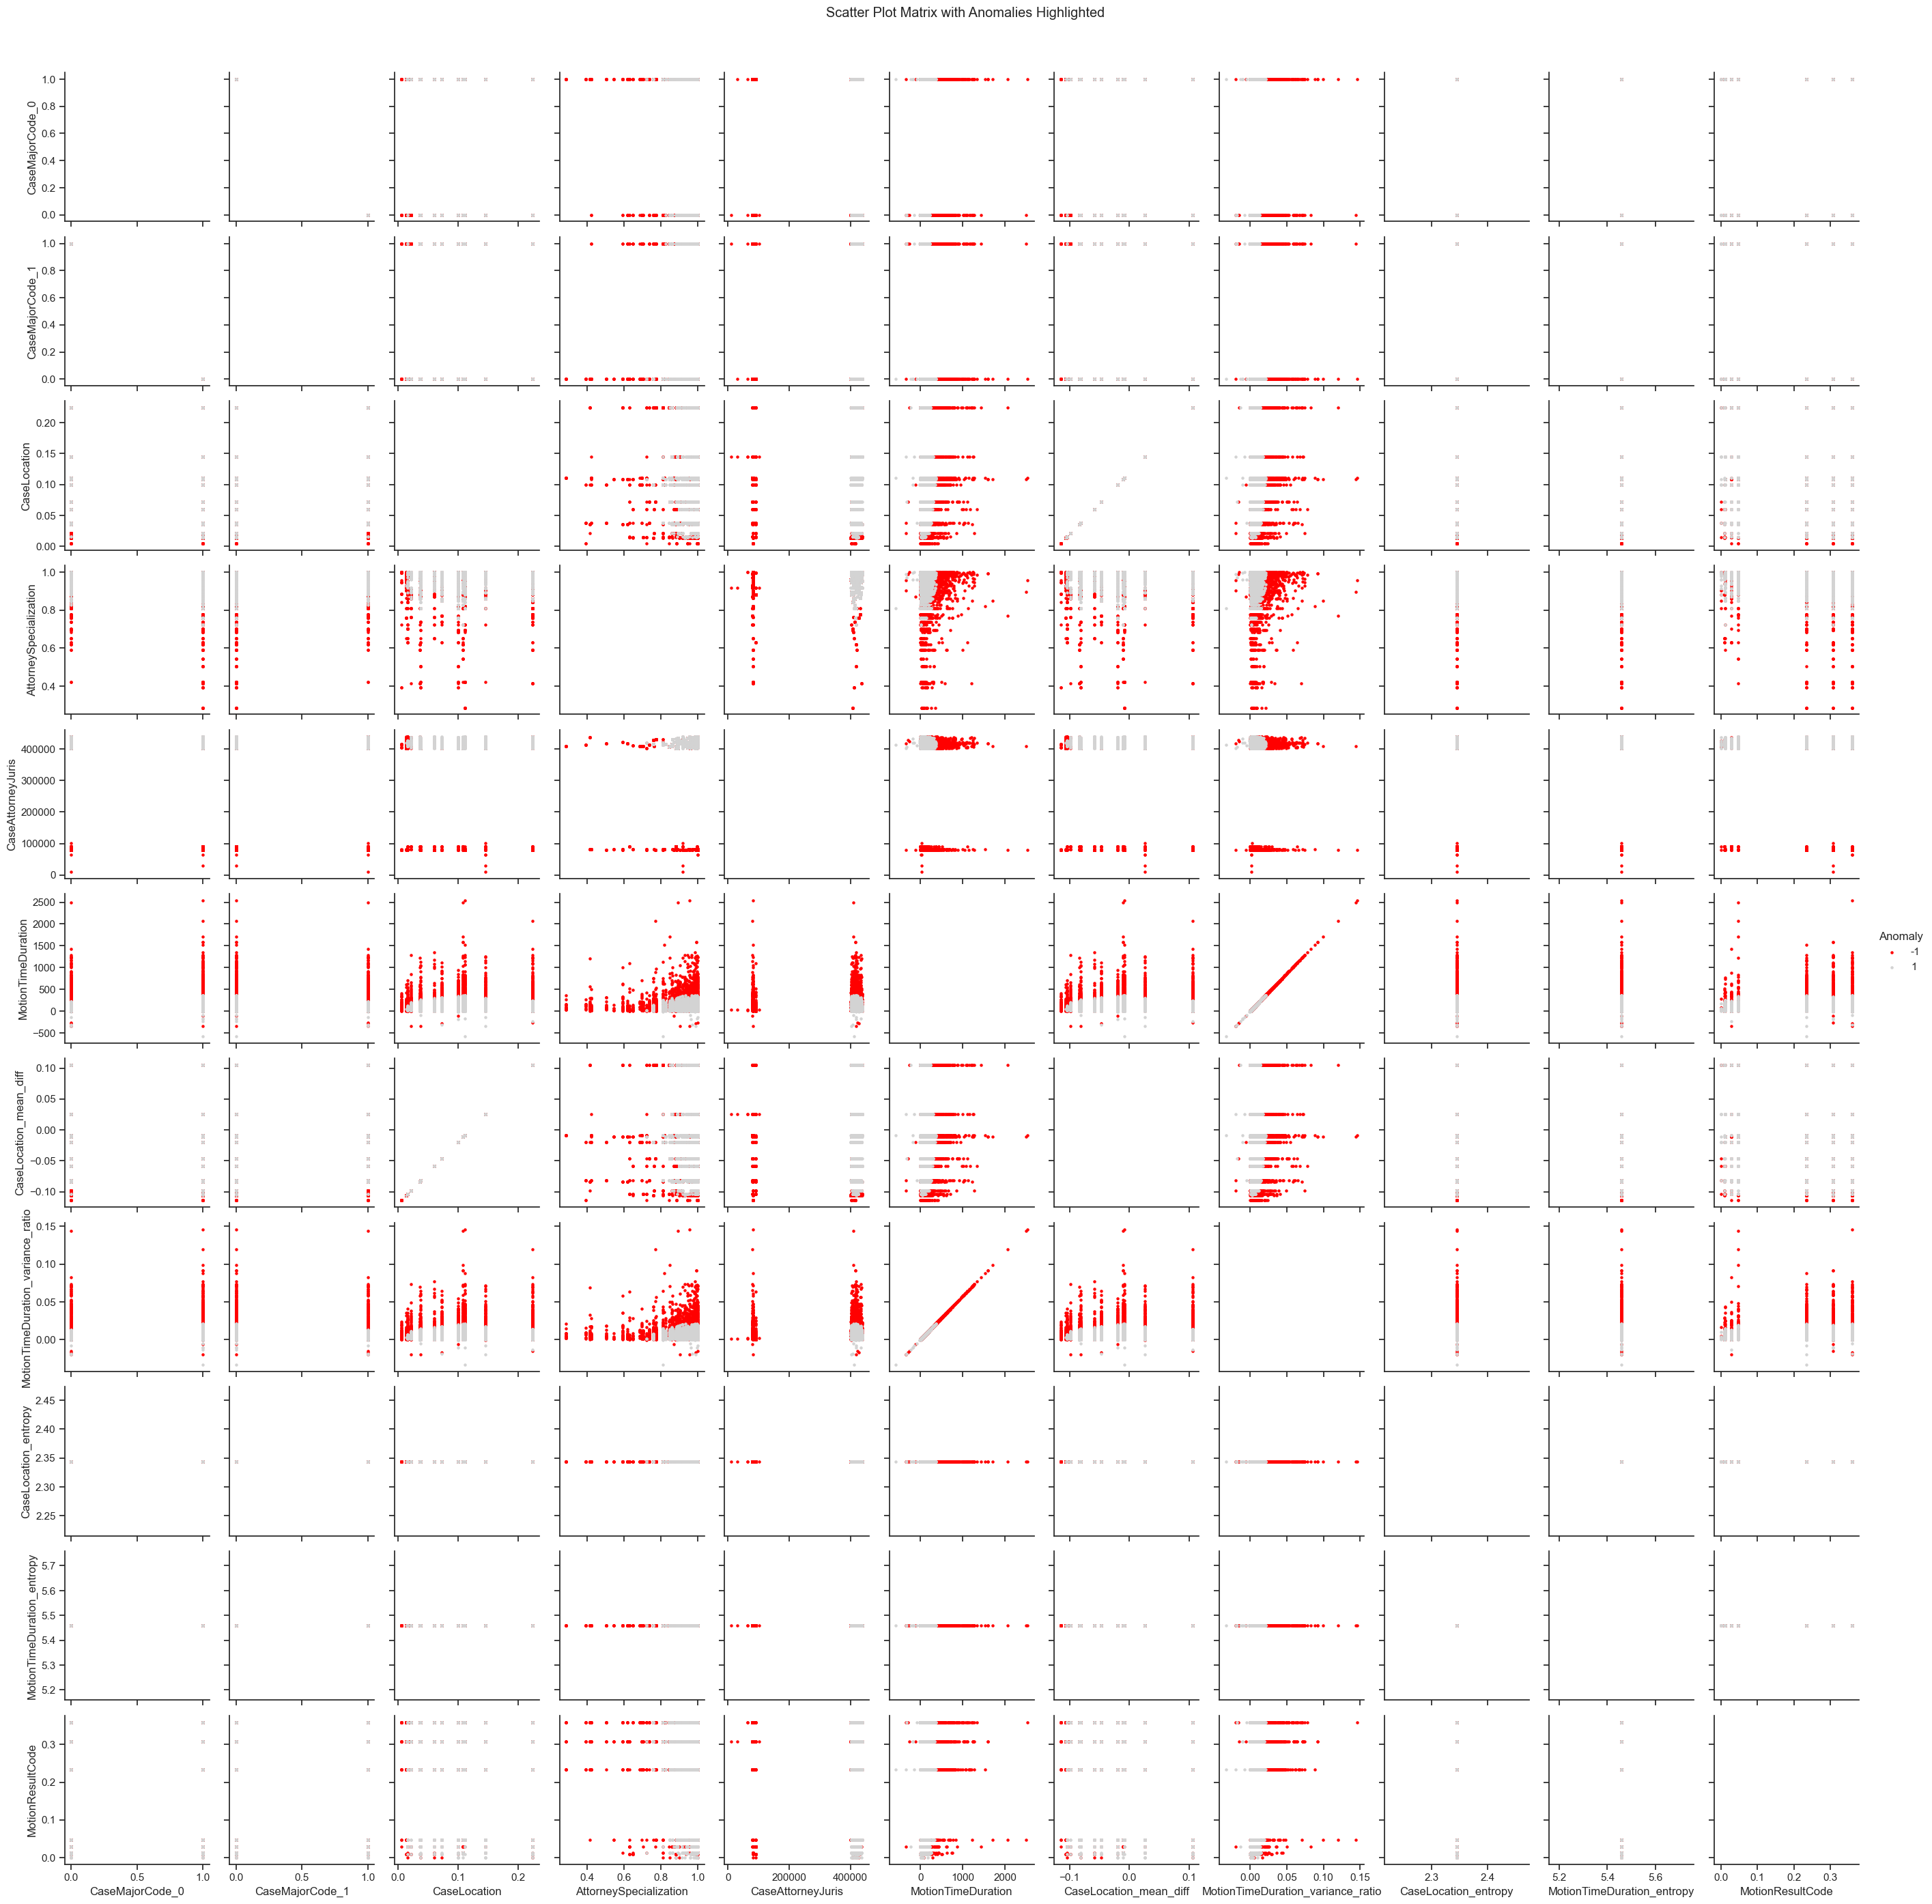

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = final.select_dtypes(include=['number']).columns.tolist()

# Ensure 'Anomaly' and 'MotionResultCode' are included (if they exist)
if 'Anomaly' not in numerical_cols and 'Anomaly' in final.columns:
    numerical_cols.append('Anomaly')
if 'MotionResultCode' not in numerical_cols and 'MotionResultCode' in final.columns:
    numerical_cols.append('MotionResultCode')

# Create the scatter plot matrix
sns.set(style="ticks")
grid = sns.PairGrid(
    final[numerical_cols],
    hue="Anomaly",
    palette={1: "lightgray", -1: "red"}
)

# Only map scatter plots to the off-diagonal elements
grid.map_offdiag(plt.scatter, s=5)

grid.add_legend()

plt.suptitle("Scatter Plot Matrix with Anomalies Highlighted", y=1.02)
plt.show()


